In [1]:

import tensorflow as tf
# tf.test.gpu_device_name()

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11995792236352592299
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3041222395097049743
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5163855559715585343
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_GPU:1"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 5484995099352327186
physical_device_desc: "device: XLA_GPU device"
]


In [2]:
!pip install --upgrade pip
!pip install plotly
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn


# !pip install statsmodels


import pandas as pd
from itertools import cycle
import numpy as np
import datetime as dt

from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, date2num
from matplotlib.dates import DateFormatter, DayLocator, HourLocator
import matplotlib.dates as md
import matplotlib.ticker as ticker

import collections

%matplotlib inline

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [10, 5]


pd.options.mode.chained_assignment = None 
import seaborn as sns; sns.set()
import pickle
import random

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api as sm

import plotly.express as px
import plotly.graph_objects as go



Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1)


In [3]:
!pip install --upgrade numpy
!pip install --upgrade pandas



Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.18.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [5]:
# House_1 = pd.read_csv('CLEAN_House1.csv', header='infer', sep = ',', parse_dates=['Time'])
# House_2 = pd.read_csv('CLEAN_House2.csv', header='infer', sep = ',', parse_dates=['Time'])

# House_1.to_pickle('/tf/House_1.pkl')
# House_2.to_pickle('/tf/House_2.pkl')

In [8]:
House_1 = pd.read_pickle('/tf/House_1.pkl')
House_2 = pd.read_pickle('/tf/House_2.pkl')

def processing_func(df):

    df['Time'] = pd.to_datetime(df['Time'])
    df = df.set_index('Time')

    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Weekday'] = df.index.day_name()
    df['Hour'] = df.index.hour
    df['Minute'] = df.index.minute

    season_lst = [(month%12 + 3)//3 for month in range(1, 13)]
    df['Season'] = (df.index.month%12 + 3) // 3
    df.Season = df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

    return df

House_1 = processing_func(House_1)
House_2 = processing_func(House_2)

House_2_new_cols = ['fridge_freezer','washing_machine','dishwasher','television','microwave',
'toaster','audio_system','kettle','fan'] 

#Rename House 2 Columns


# House_2.head()
House_2_cols = list(House_2.columns)
House_2_cols[2:11] = House_2_new_cols
House_2.columns = House_2_cols
House_2.columns


def ordering_weekdays(df ,weekday_col):
    days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df[weekday_col] = pd.Categorical(df[weekday_col], categories=days_of_week, ordered=True)

    return df


def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

# House_1 = ordering_weekdays(House_1, 'Weekday')
House_2 = ordering_weekdays(House_2, 'Weekday')


In [9]:
def overall_activity(df):
  
    for col in df.columns[2:11]:
        if col is 'fridge_freezer':
            continue
        else:
            df[col + '_activity'] = np.where(df[col] > 0, 1, 0)
            
    activity_col = []
    for col in House_2.columns.tolist():
        if '_activity' in col:
            activity_col.append(col)

    House_2['target'] = np.where(House_2[activity_col].eq(1).any(1), 1, 0)
    
    return House_2

House_2 = overall_activity(House_2)


In [11]:
# House_2.resample('8s').first()
House_2.reset_index(inplace=True)
House_2.head()
House_2.to_pickle('/tf/House_2_pytorch.pkl')


In [ ]:
# House_2.to_pickle('/tf/House_2_pytorch.pkl')

In [8]:
House_2.reset_index()

,Unix,Aggregate,fridge_freezer,washing_machine,dishwasher,television,microwave,toaster,audio_system,kettle,...,Season,washing_machine_activity,dishwasher_activity,television_activity,microwave_activity,toaster_activity,audio_system_activity,kettle_activity,fan_activity,all_activity
Time,,,,,,,,,,,,,,,,,,,,,
2013-09-17 22:08:11,1379455691,695,88,0,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
2013-09-17 22:08:18,1379455698,694,88,0,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
2013-09-17 22:08:26,1379455706,694,88,0,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
2013-09-17 22:08:34,1379455714,702,88,0,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
2013-09-17 22:08:42,1379455722,700,88,0,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-28 08:05:16,1432800316,315,82,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
2015-05-28 08:05:23,1432800323,333,81,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
2015-05-28 08:05:30,1432800330,313,81,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1


In [21]:
House_2[House_2.target == 1]
# House_2.target.value_counts()
House_2[House_2.washing_machine_activity == 1]

,Unix,Aggregate,fridge_freezer,washing_machine,dishwasher,television,microwave,toaster,audio_system,kettle,...,Season,washing_machine_activity,dishwasher_activity,television_activity,microwave_activity,toaster_activity,audio_system_activity,kettle_activity,fan_activity,target
Time,,,,,,,,,,,,,,,,,,,,,
2013-09-18 06:20:14,1379485214,3349,1,0,0,0,0,0,0,2653,...,Fall,0,0,0,0,0,0,1,0,1
2013-09-18 06:20:16,1379485216,3226,1,0,0,0,0,0,0,2670,...,Fall,0,0,0,0,0,0,1,0,1
2013-09-18 06:20:24,1379485224,3132,1,0,0,0,0,0,0,2642,...,Fall,0,0,0,0,0,0,1,0,1
2013-09-18 06:20:31,1379485231,3197,1,0,0,0,0,0,0,2659,...,Fall,0,0,0,0,0,0,1,0,1
2013-09-18 06:20:38,1379485238,3117,1,0,0,0,0,0,0,2670,...,Fall,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-05-28 08:05:16,1432800316,315,82,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
2015-05-28 08:05:23,1432800323,333,81,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1
2015-05-28 08:05:30,1432800330,313,81,28,0,0,0,0,0,0,...,Spring,1,0,0,0,0,0,0,0,1


In [12]:
House_2.head(100)

,Time,Unix,Aggregate,fridge_freezer,washing_machine,dishwasher,television,microwave,toaster,audio_system,...,Season,washing_machine_activity,dishwasher_activity,television_activity,microwave_activity,toaster_activity,audio_system_activity,kettle_activity,fan_activity,target
0,2013-09-17 22:08:11,1379455691,695,88,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
1,2013-09-17 22:08:18,1379455698,694,88,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
2,2013-09-17 22:08:26,1379455706,694,88,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
3,2013-09-17 22:08:34,1379455714,702,88,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
4,2013-09-17 22:08:42,1379455722,700,88,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013-09-17 22:18:15,1379456295,684,84,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
96,2013-09-17 22:18:16,1379456296,684,84,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
97,2013-09-17 22:18:23,1379456303,683,84,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0
98,2013-09-17 22:18:31,1379456311,683,84,0,0,0,0,0,0,...,Fall,0,0,0,0,0,0,0,0,0


# Kettle Patterns
So, it seems that kettle starts off with a very high power units. Sometimes, it just gives 1 for some period of time, which I assume to be noise.


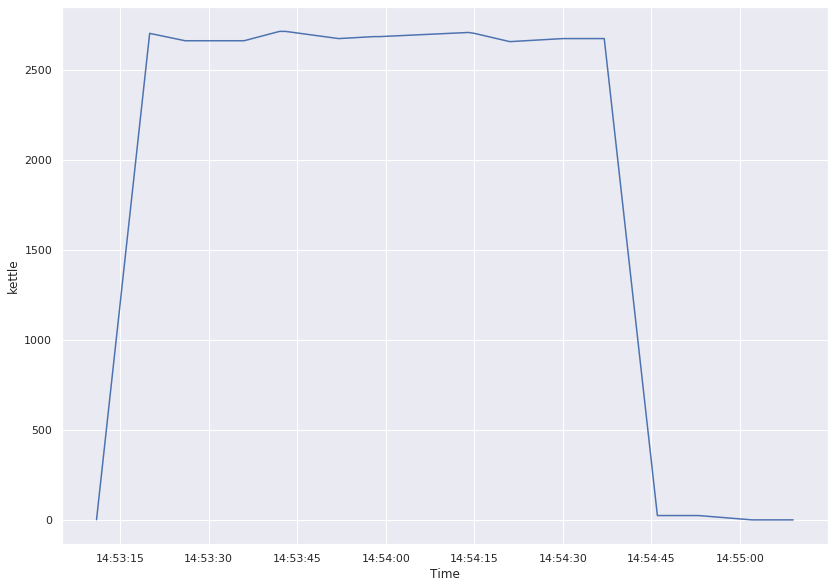

In [11]:
a4_dims = (11.7, 8.27) #Configure the plot size
fig, ax = plt.subplots(figsize=a4_dims)
# House_2['2013-09-23'].between_time('19:29:23' , '19:33:30')
# House_2['2013-09-23'].between_time('9:18:15' , '9:20:30')

# House_2['2013-10-05'].between_time('6:19:00' , '6:21:30')
sns.lineplot(House_2['2014-07-08'].between_time('14:53:11' , '14:55:11').index, House_2['2014-07-08'].between_time('14:53:11' , '14:55:11')['kettle'])
#  Timestamp('2014-07-08 14:53:11'),
plt.tight_layout()

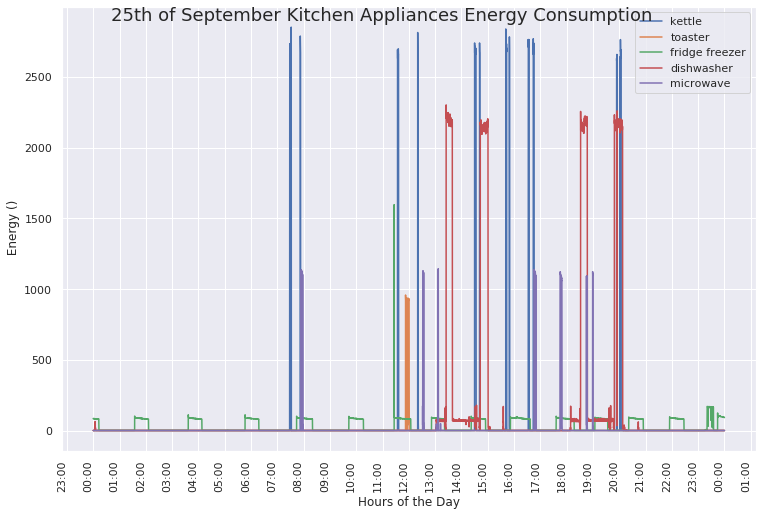

In [14]:
a4_dims = (10.7, 7.27) #Configure the plot size
fig, ax = plt.subplots(figsize=a4_dims)

h_fmt = md.DateFormatter('%H:%M')


sns.lineplot(data=House_2['2015-02-02'], x=House_2['2015-02-02'].index, y=House_2['2015-02-02']['kettle'],
             label='kettle')

sns.lineplot(data=House_2['2015-02-02'], x=House_2['2015-02-02'].index, y=House_2['2015-02-02']['toaster'],
             label='toaster')

sns.lineplot(data=House_2['2015-02-02'], x=House_2['2015-02-02'].index, y=House_2['2015-02-02']['fridge_freezer'],
             label='fridge freezer')

sns.lineplot(data=House_2['2015-02-02'], x=House_2['2015-02-02'].index, y=House_2['2015-02-02']['dishwasher'],
             label='dishwasher')

# ax.xaxis.set_major_locator(HourLocator()) #This creates 1-hour intervals

# ax.xaxis.set_major_formatter(h_fmt) #This makes sure that each of them is being formatted in the same way
# plt.setp(ax.get_xticklabels(), ha="right", rotation=90)



# ax.set(xlabel='Hours of the Day', ylabel=' Ke (Appliance1)')

# House_2_Fall_Appliance8.figure.suptitle("18th of November Kettle Energy Consumption", fontsize = 18)

# plt.tight_layout()

# a4_dims = (11.7, 8.27) #Configure the plot size
# fig, ax = plt.subplots(figsize=a4_dims)

h_fmt = md.DateFormatter('%H:%M')


sns.lineplot(data=House_2['2015-02-02'], x=House_2['2015-02-02'].index, y=House_2['2015-02-02']['microwave'], label='microwave')

ax.xaxis.set_major_locator(HourLocator()) #This creates 1-hour intervals

ax.xaxis.set_major_formatter(h_fmt) #This makes sure that each of them is being formatted in the same way
plt.setp(ax.get_xticklabels(), ha="right", rotation=90)



ax.set(xlabel='Hours of the Day', ylabel=' Energy ()')

ax.figure.suptitle("25th of September Kitchen Appliances Energy Consumption", fontsize = 18)
ax.legend()
plt.tight_layout()